In [1]:
from tensorflow.keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Input, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import Conv2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import pickle
import tensorflow as tf

In [2]:
def loadPickleData(file):
    data = pickle.load(open(file, 'rb'));
    images = data[0];
    labels = data[1];
    return [images, labels]

In [3]:
[images,labels] = loadPickleData("./../Data/pickledFiles/Num_NewData_1char_3channel.p")

In [4]:
y = np_utils.to_categorical(labels);
print(y);
print(y.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(5000, 10)


In [5]:
X = images
X.shape
# X = np.reshape(X, (2000,60,40,1))

(5000, 60, 40, 3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2);

In [7]:
model = applications.VGG19(weights = "imagenet", include_top=False,\
                           input_shape = (60, 40, 3))

In [8]:
print(len(model.layers))
for layer in model.layers[0:19]:
    layer.trainable = False

22


In [9]:
inputt = Input(shape =  (60,40,3), name = 'captcha_input')
output_vgg16_conv = model(inputt);

In [10]:
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(100, activation="relu")(x)

In [11]:
x = Dropout(.1)(x)
predictions = Dense(10, activation="softmax")(x)


In [12]:
model_final = Model(inputt,predictions)


In [13]:
model_final.compile(loss = "categorical_crossentropy",\
                    optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

In [14]:
print(model_final.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
captcha_input (InputLayer)   [(None, 60, 40, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               51300     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 20,076,694
Trainable params: 4,771,926
Non-trainable params: 15,304,768
_________________________________________

In [15]:
lossCheck = ModelCheckpoint('singleCharLossNewData2.h5', monitor='val_loss', verbose=True, save_best_only=True)
accCheck = ModelCheckpoint('singleCharAccNewData2.h5', monitor='val_accuracy', verbose=True, save_best_only=True)

In [19]:
history = model_final.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=300, epochs=100, verbose=1, callbacks=[lossCheck, accCheck])

Epoch 1/100
14/14 [==============================] - 20s 1s/step - loss: 6.5441 - accuracy: 0.1258 - val_loss: 2.4009 - val_accuracy: 0.1600

Epoch 00001: val_loss improved from inf to 2.40090, saving model to singleCharLossNewData2.h5

Epoch 00001: val_accuracy improved from -inf to 0.16000, saving model to singleCharAccNewData2.h5
Epoch 2/100
14/14 [==============================] - 20s 1s/step - loss: 2.3209 - accuracy: 0.1462 - val_loss: 2.2319 - val_accuracy: 0.1690

Epoch 00002: val_loss improved from 2.40090 to 2.23194, saving model to singleCharLossNewData2.h5

Epoch 00002: val_accuracy improved from 0.16000 to 0.16900, saving model to singleCharAccNewData2.h5
Epoch 3/100
14/14 [==============================] - 33s 2s/step - loss: 2.2338 - accuracy: 0.1562 - val_loss: 2.1834 - val_accuracy: 0.1720

Epoch 00003: val_loss improved from 2.23194 to 2.18336, saving model to singleCharLossNewData2.h5

Epoch 00003: val_accuracy improved from 0.16900 to 0.17200, saving model to single

14/14 [==============================] - 37s 3s/step - loss: 0.7320 - accuracy: 0.7375 - val_loss: 0.9537 - val_accuracy: 0.6890

Epoch 00052: val_loss improved from 0.99188 to 0.95375, saving model to singleCharLossNewData2.h5

Epoch 00052: val_accuracy improved from 0.66900 to 0.68900, saving model to singleCharAccNewData2.h5
Epoch 53/100
14/14 [==============================] - 37s 3s/step - loss: 0.7077 - accuracy: 0.7505 - val_loss: 0.9633 - val_accuracy: 0.6590

Epoch 00053: val_loss did not improve from 0.95375

Epoch 00053: val_accuracy did not improve from 0.68900
Epoch 54/100
14/14 [==============================] - 35s 3s/step - loss: 0.6838 - accuracy: 0.7660 - val_loss: 0.9315 - val_accuracy: 0.6860

Epoch 00054: val_loss improved from 0.95375 to 0.93153, saving model to singleCharLossNewData2.h5

Epoch 00054: val_accuracy did not improve from 0.68900
Epoch 55/100
14/14 [==============================] - 36s 3s/step - loss: 0.6762 - accuracy: 0.7632 - val_loss: 0.9399 - va

14/14 [==============================] - 35s 3s/step - loss: 0.4009 - accuracy: 0.8705 - val_loss: 0.8573 - val_accuracy: 0.7090

Epoch 00082: val_loss did not improve from 0.84697

Epoch 00082: val_accuracy did not improve from 0.71900
Epoch 83/100
14/14 [==============================] - 38s 3s/step - loss: 0.3903 - accuracy: 0.8745 - val_loss: 0.8756 - val_accuracy: 0.7170

Epoch 00083: val_loss did not improve from 0.84697

Epoch 00083: val_accuracy did not improve from 0.71900
Epoch 84/100
14/14 [==============================] - 37s 3s/step - loss: 0.3826 - accuracy: 0.8792 - val_loss: 0.8879 - val_accuracy: 0.7190

Epoch 00084: val_loss did not improve from 0.84697

Epoch 00084: val_accuracy did not improve from 0.71900
Epoch 85/100
14/14 [==============================] - 37s 3s/step - loss: 0.3801 - accuracy: 0.8832 - val_loss: 0.8605 - val_accuracy: 0.7290

Epoch 00085: val_loss did not improve from 0.84697

Epoch 00085: val_accuracy improved from 0.71900 to 0.72900, saving m

In [21]:
import matplotlib.pyplot as plt

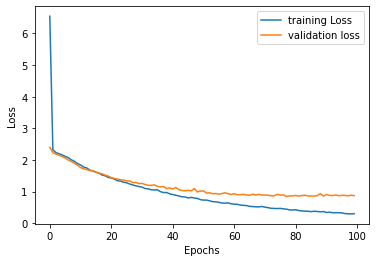

In [22]:
plt.plot(history.history['loss'], label = "training Loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

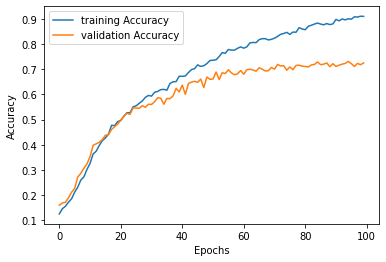

In [23]:
plt.plot(history.history['accuracy'], label = "training Accuracy")
plt.plot(history.history['val_accuracy'], label = "validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [16]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1588803104032413045
]


In [17]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


In [18]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [59]:
!pip install tensorflow

In [ ]:
history1 = model_final.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=300, epochs=50, verbose=1);

In [57]:
history2 = model_final.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=300, epochs=50, verbose=1);

Epoch 1/50
6/6 [==============================] - 8s 1s/step - loss: 0.7408 - accuracy: 0.7550 - val_loss: 1.7918 - val_accuracy: 0.4675
Epoch 2/50
6/6 [==============================] - 8s 1s/step - loss: 0.7422 - accuracy: 0.7575 - val_loss: 1.8043 - val_accuracy: 0.4625
Epoch 3/50
6/6 [==============================] - 8s 1s/step - loss: 0.7343 - accuracy: 0.7569 - val_loss: 1.8027 - val_accuracy: 0.4650
Epoch 4/50
6/6 [==============================] - 8s 1s/step - loss: 0.7151 - accuracy: 0.7619 - val_loss: 1.7949 - val_accuracy: 0.4775
Epoch 5/50
6/6 [==============================] - 8s 1s/step - loss: 0.7033 - accuracy: 0.7713 - val_loss: 1.8078 - val_accuracy: 0.4525
Epoch 6/50
6/6 [==============================] - 8s 1s/step - loss: 0.6999 - accuracy: 0.7706 - val_loss: 1.7969 - val_accuracy: 0.4775
Epoch 7/50
6/6 [==============================] - 8s 1s/step - loss: 0.6904 - accuracy: 0.7756 - val_loss: 1.8212 - val_accuracy: 0.4575
Epoch 8/50
6/6 [=========================

In [61]:
max(max(history.history["val_accuracy"]), max(history1.history["val_accuracy"]), max(history2.history["val_accuracy"]))

0.47999998927116394

In [63]:
xtr = model_final.predict(X_train, batch_size = 200, verbose=1)

8/8 [==============================] - 5s 569ms/step


In [64]:
Xtest = model_final.predict(X_test, batch_size = 100, verbose=1);

4/4 [==============================] - 1s 294ms/step


In [65]:
print(xtr.shape)

(1600, 10)


In [66]:
resize = np.prod(xtr.shape[1:])

In [67]:
xtr = np.reshape(xtr, (1600, resize));
Xtest = np.reshape(Xtest, (400, resize));

In [74]:
bf_train_s = xtr
bf_test_s = Xtest

In [75]:
y_train_mc = np.argmax(y_train, axis=1)
y_test_mc = np.argmax(y_test, axis = 1)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm


In [77]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', verbose=1,max_iter=10000)

In [78]:
clf.fit(bf_train_s,y_train_mc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, multi_class='multinomial', verbose=1)

In [79]:
print(clf.score(bf_test_s, y_test_mc))

0.4675


In [81]:
multiClassSVM = svm.LinearSVC(loss = 'squared_hinge', penalty = 'l2',C=1/5000 ,max_iter=800000,verbose=1) 
multiClassSVM.fit(bf_train_s,y_train_mc)

[LibLinear]

LinearSVC(C=0.0002, max_iter=800000, verbose=1)

In [82]:
multiClassSVM.score(bf_test_s, y_test_mc)

0.465